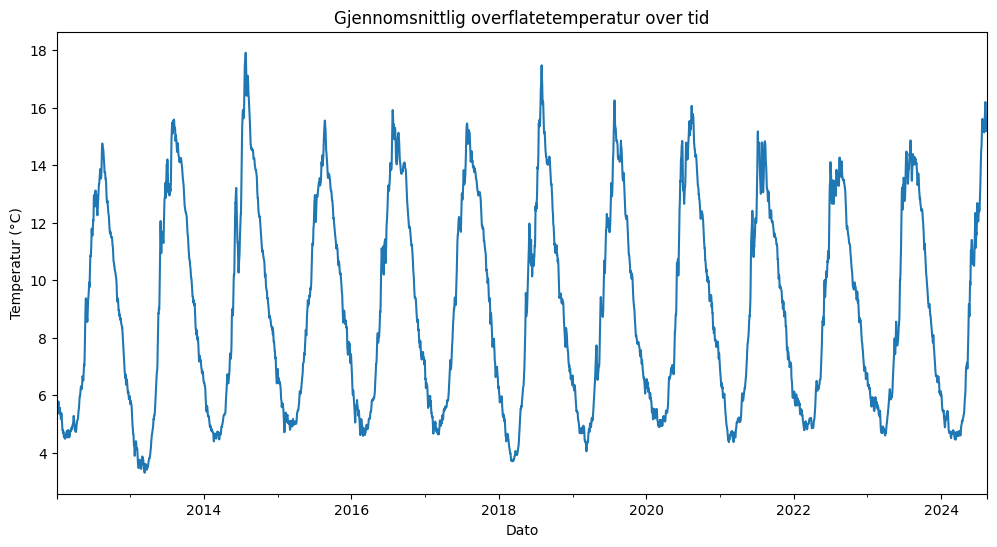

,PO_1,PO_2,PO_3,PO_4,PO_5,PO_6,PO_7,PO_8,PO_9,PO_10,PO_11,PO_12,PO_13,Date
0,5.59,5.59,6.10,5.65,5.90,5.95,6.06,6.14,6.03,5.63,5.28,4.95,4.61,2012-01-05
1,5.53,5.23,5.91,5.62,5.78,5.95,5.94,5.95,5.93,5.53,5.24,4.96,4.60,2012-01-06
2,5.44,5.14,5.94,5.72,5.78,5.81,5.74,5.71,5.83,5.42,5.21,4.96,4.62,2012-01-07
3,5.32,4.92,5.70,5.43,5.53,5.67,5.60,5.64,5.80,5.37,5.19,5.00,4.61,2012-01-08
4,5.19,5.42,6.00,5.96,5.77,5.77,5.82,5.81,5.84,5.37,5.17,5.00,4.57,2012-01-09


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Filsti
file_path = "Bachelor/data/raw/times_NK800_SST_PO.asc"

# Laste inn data
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Navngi kolonnene (Antar at første tre kolonner er år, måned, dag, resten er temperaturer)
num_columns = df.shape[1]
column_names = ['Year', 'Month', 'Day'] + [f'PO_{i+1}' for i in range(num_columns - 3)]
df.columns = column_names

# Konverter dato til datetime-format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Sortere etter dato
df = df.sort_values(by='Date')

# Fjerne de separate år/måned/dag-kolonnene
df = df.drop(columns=['Year', 'Month', 'Day'])

# Plot gjennomsnittlig temperatur over tid
df.set_index('Date').mean(axis=1).plot(figsize=(12, 6), title="Gjennomsnittlig overflatetemperatur over tid", ylabel="Temperatur (°C)", xlabel="Dato")
plt.show()

# Vise de første radene
df.head()
